In [58]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
from global_land_mask import globe

BLUE = "#3670CF"
LIGHT_BLUE = "#4A80D8"
LIGHT_MAGENTA = "#E7D9F1"

In [78]:
def draw(lats, lons):
    # miller projection 
    map = Basemap(projection='mill',lon_0=0)
    # plot coastlines, draw label meridians and parallels.
    map.drawcoastlines()
    map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
    map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
    # fill continents 'coral' (with zorder=0), color wet areas 'aqua'
    map.fillcontinents(color='white',lake_color=LIGHT_BLUE)

    x, y = map(lons,lats)
    map.drawmapboundary(fill_color=LIGHT_BLUE)
    map.scatter(x,y,1,marker='o',color=LIGHT_MAGENTA)
    # plt.title('Locations of %s ARGO floats active between %s and %s' %\
    #         (len(lats),date1,date2),fontsize=12)
    plt.savefig('jan_1960_filtered.png', dpi=300)
    #plt.show()
    

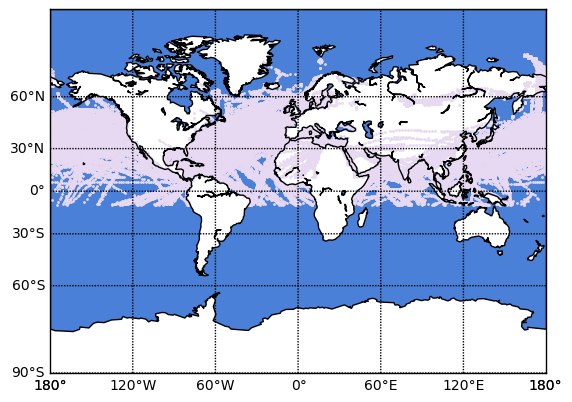

In [77]:
column_name = ['year', 'mon', 'day', 'hour', 'lat', 'lon', 'hsun', 'slp', 'ta', 'sst', 'td', 'rh', 'icn', 'icl', 'low', 'mid', 'high', 'iw', 'ws', 'wd']
jan_1960 = pd.read_fwf("data/1960_01_data.fwf", names=column_name)
draw(jan_1960["lat"], jan_1960["lon"])

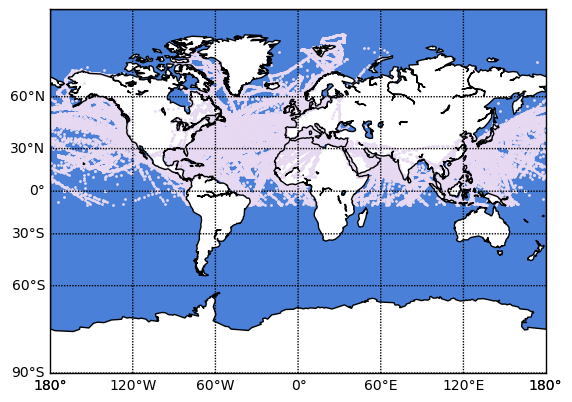

<Figure size 640x480 with 0 Axes>

In [73]:
column_name = ['year', 'mon', 'day', 'hour', 'lat', 'lon', 'hsun', 'slp', 'ta', 'sst', 'td', 'rh', 'icn', 'icl', 'low', 'mid', 'high', 'iw', 'ws', 'wd']
jul_2017 = pd.read_fwf("data/2017_07_data.fwf", names=column_name)
draw(jul_2017["lat"], jul_2017["lon"])

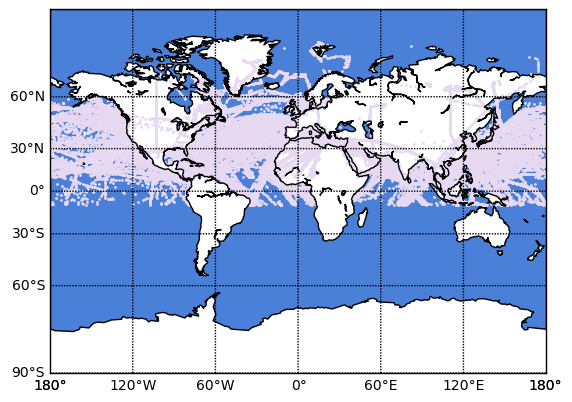

In [55]:
column_name = ['year', 'mon', 'day', 'hour', 'lat', 'lon', 'hsun', 'slp', 'ta', 'sst', 'td', 'rh', 'icn', 'icl', 'low', 'mid', 'high', 'iw', 'ws', 'wd']
jan_2017 = pd.read_fwf("data/2017_01_data.fwf", names=column_name)
draw(jan_2017["lat"], jan_2017["lon"])

In [68]:
test = jan_2017[["lon", "lat"]].head(100)
# land = test.apply(lambda x: globe.is_land(x["lon"], x["lat"]))
test[globe.is_land(test['lat'], test['lon'])]

,lon,lat
15,-148.70,60.80
22,-1.20,60.20
23,-1.20,60.20
27,-151.42,59.60
29,-153.35,59.38
33,-3.30,59.00
47,-6.40,58.20
68,-2.10,57.10
69,-2.10,57.10
80,-5.50,56.40


In [66]:
test[globe.is_land(test['lat'], test['lon'])]

-153.35

In [69]:
!pip3 install global_land_mask
from global_land_mask import globe

def filter_land(df):
    return df[globe.is_land(df['lat'], df['lon'])]

In [70]:
jan_2017[globe.is_land(jan_2017['lat'], jan_2017['lon'])].count()

year    263795
mon     263795
day     263795
hour    263795
lat     263795
lon     263795
hsun    263795
slp     263795
ta      263795
sst     263795
td      263795
rh      263795
icn     263795
icl     263795
low     263795
mid     263795
high    263795
iw      263795
ws      263795
wd      263795
dtype: int64

In [71]:
jan_2017.count()

year    566718
mon     566718
day     566718
hour    566718
lat     566718
lon     566718
hsun    566718
slp     566718
ta      566718
sst     566718
td      566718
rh      566718
icn     566718
icl     566718
low     566718
mid     566718
high    566718
iw      566718
ws      566718
wd      566718
dtype: int64

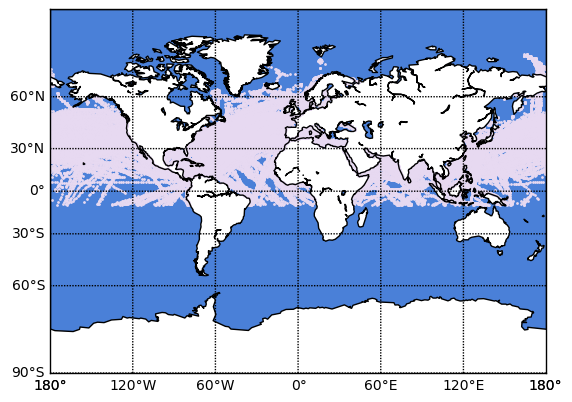

In [81]:
filtered = jan_1960[globe.is_land(jan_1960['lat'], jan_1960['lon']) == False]
draw(filtered["lat"], filtered["lon"])

In [86]:
#stupid
def get_day_number(month, day):
    return 31*(month-1)+day

#smart
from datetime import datetime, timedelta
def get_day_number_smart(month, day):
    return (datetime(1996, month, day) - datetime(1996, 1, 1)).days
# закодировать гармонической функцией, как обычные цикличные переменные, так же со временем, долготы тоже (синус и косинус). делить на 365, умножить на 2пи
# для региональных моделей фильтровать например по средиземную морю, а не просто лан лот больше х
# широты пофиг, долготы закодировать двумя гармоничными функциями (sin cos)

In [112]:
def draw_distribution(x, filename=""):
    plt.hist(x,20, facecolor=BLUE, alpha=0.5)
    if not filename:
        plt.show()
    else:
        plt.savefig(filename, dpi=300)

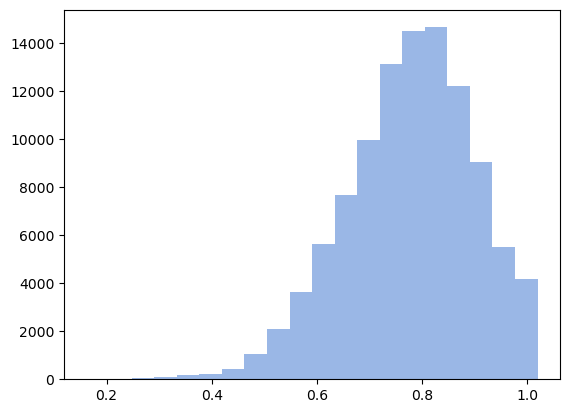

In [113]:
draw_distribution(filtered["rh"], "jun_2017_distribution.png")

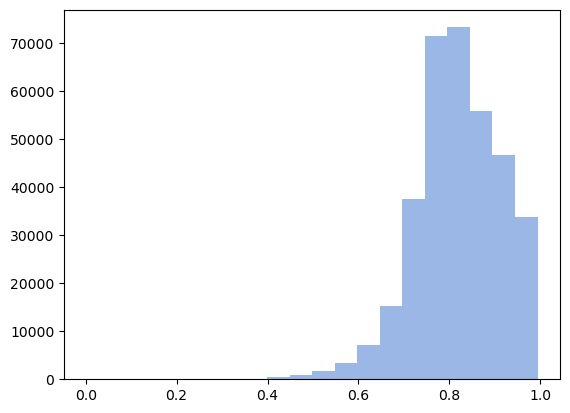

In [114]:
filtered_jul = jul_2017[globe.is_land(jul_2017['lat'], jul_2017['lon']) == False]
filtered_jul = filtered_jul[filtered_jul["rh"] < 1]

draw_distribution(filtered_jul["rh"], "jul_2017_distribution.png")

In [130]:
from copy import copy

def code_cyclic_values(df, cyclic_columns):
    new_df = copy(df)
    new_df.drop(cyclic_columns, axis=1, inplace=True)
    for c in cyclic_columns:
        max_v = df[c].max()
        new_df[f'{c}_sin'] = np.sin(2 * np.pi * df[c]/max_v)
        new_df[f'{c}_cos'] = np.cos(2 * np.pi * df[c]/max_v)
        
    return new_df

In [123]:
filtered

1

In [133]:

code_cyclic_values(filtered.head(100), ["mon", "hour"])

,year,day,lat,lon,hsun,slp,ta,sst,td,rh,...,low,mid,high,iw,ws,wd,mon_sin,mon_cos,hour_sin,hour_cos
0,1960,1,66.0,2.0,-46.23,980.0,5.0,7.5,-0.8,0.661,...,2,0,0,1,11.3,270.0,-2.449294e-16,1.0,NaN,NaN
1,1960,1,61.9,-32.4,-43.97,975.9,-1.7,4.9,-4.1,0.836,...,9,-9,-9,26,25.7,240.0,-2.449294e-16,1.0,NaN,NaN
2,1960,1,60.7,-31.9,-44.97,986.8,-3.9,5.6,-9.9,0.629,...,3,2,0,70,12.3,240.0,-2.449294e-16,1.0,NaN,NaN
3,1960,1,59.5,-14.2,-51.06,994.2,7.2,9.3,5.1,0.865,...,2,0,0,25,9.3,250.0,-2.449294e-16,1.0,NaN,NaN
4,1960,1,59.2,-0.2,-53.02,987.2,8.0,9.0,6.0,0.872,...,7,-9,-9,51,9.0,200.0,-2.449294e-16,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1960,1,42.7,41.0,-52.69,1010.4,12.1,10.0,6.0,0.663,...,5,-9,-9,0,11.0,90.0,-2.449294e-16,1.0,NaN,NaN
96,1960,1,42.7,157.6,21.05,1010.7,4.0,8.0,0.0,0.751,...,8,-9,-9,74,4.1,130.0,-2.449294e-16,1.0,NaN,NaN
97,1960,1,42.6,6.5,-69.49,1021.0,14.0,13.4,11.2,0.832,...,-9,-9,-9,-99,2.6,300.0,-2.449294e-16,1.0,NaN,NaN
98,1960,1,42.6,-52.2,-40.94,1006.0,7.0,11.8,2.6,0.735,...,-9,-9,-9,-99,8.1,330.0,-2.449294e-16,1.0,NaN,NaN


In [146]:
jan_1960["day"].max()

9

In [140]:
filtered_encoded = copy(filtered_jul)

filtered_encoded["day_number"] = get_day_number(filtered_encoded["mon"], filtered_encoded["day"])
filtered_encoded.drop(["day", "mon"], axis=1, inplace=True)
# или можно дропнуть hour
filtered_encoded = code_cyclic_values(filtered_encoded, ["lon", "day_number", "hour"])
filtered_encoded

,year,lat,hsun,slp,ta,sst,td,rh,icn,icl,...,high,iw,ws,wd,lon_sin,lon_cos,day_number_sin,day_number_cos,hour_sin,hour_cos
0,2017,81.60,-29.50,1013.6,-1.2,-1.7,-2.1,0.936,-9,-9,...,-9,-99,5.0,310.0,0.908043,0.418878,-0.254927,0.96696,0.000000e+00,1.000000
1,2017,78.70,-32.93,1018.7,0.6,-99.9,-3.2,0.756,-9,-9,...,-9,-99,-9.9,-9.9,0.682303,0.731069,-0.254927,0.96696,0.000000e+00,1.000000
2,2017,75.90,-33.95,1018.1,0.4,2.1,-1.4,0.877,-9,-9,...,-9,-99,3.0,320.0,0.943450,0.331515,-0.254927,0.96696,0.000000e+00,1.000000
3,2017,71.30,-39.74,1015.2,8.4,8.9,4.8,0.781,1,1,...,0,2,7.2,70.0,0.702461,0.711722,-0.254927,0.96696,0.000000e+00,1.000000
4,2017,66.00,-46.14,1007.1,10.9,-99.9,8.9,0.875,6,2,...,8,2,9.3,80.0,0.279142,0.960250,-0.254927,0.96696,0.000000e+00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678466,2017,45.10,5.41,1018.2,14.7,11.7,12.8,0.884,-9,-9,...,-9,-99,6.2,350.0,0.930661,-0.365883,-0.254927,0.96696,-7.071068e-01,-0.707107
678487,2017,29.37,-9.81,1013.9,29.5,30.7,23.3,0.694,-9,-9,...,-9,-99,7.7,80.0,0.049923,-0.998753,-0.254927,0.96696,0.000000e+00,1.000000
678490,2017,13.10,-13.57,1005.7,29.1,-99.9,24.1,0.745,-9,-9,...,-9,-99,5.0,330.0,0.330691,-0.943739,-0.254927,0.96696,-2.449294e-16,1.000000
678491,2017,13.10,-13.57,1008.4,27.7,-99.9,22.8,0.747,-9,-9,...,-9,-99,3.0,250.0,0.330691,-0.943739,-0.254927,0.96696,-2.449294e-16,1.000000


In [150]:
rh_1960 = pd.read_fwf("data/1960_01_data.fwf", names=column_name)["rh"]
for n in [str(num).zfill(2) for num in range(2,3)]:
    df_next_file = pd.read_fwf(f"data/1960_{n}_data.fwf", names=column_name)["rh"]
    rh_1960 = pd.concat([rh_1960, df_next_file], axis=0)
rh_1960

0         0.661
1         0.836
2         0.629
3         0.865
4         0.872
          ...  
109113    0.900
109114    0.818
109115    0.883
109116    0.826
109117    0.757
Name: rh, Length: 218834, dtype: float64

In [170]:
rh_1960_full = pd.read_fwf("data/1960_01_data.fwf", names=column_name)[["rh", "mon", "day", "lat", "lon"]]
for n in [str(num).zfill(2) for num in range(2,13)]:
    df_next_file = pd.read_fwf(f"data/1960_{n}_data.fwf", names=column_name)[["rh", "mon", "day", "lat", "lon"]]
    rh_1960_full = pd.concat([rh_1960_full, df_next_file], axis=0)
rh_1960_full["day_number"] = get_day_number(rh_1960_full["mon"], rh_1960_full["day"])

In [176]:
def check_lon_lat(lon, lat):
    return lat > 20 and lat < 60 and lon<-19  a

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [174]:
def draw_rh(df, filename=''):
    fig, ax = plt.subplots()
    ax.plot(df["day_number"], df["rh"]

    #ax.set(xlabel='time (s)', ylabel='voltage (mV)',
    #       title='About as simple as it gets, folks')
    ax.grid()

    # fig.savefig("test.png")
    plt.show()

atlantic = rh_1960_full[rh_1960_full["lat"] > 20 and rh_1960_full["lat"] < 60 and rh_1960_full["lon"] <-19 and rh_1960_full["lon"]>-51]
draw_rh(atlantic)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().